# Resources
- https://www.kaggle.com/code/ozkanozturk/stock-price-prediction-by-simple-rnn-and-lstm

In [7]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

df = yf.download("TSLA", start="2011-01-01", end="2021-01-01")

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2011-01-03  1.789333  1.800000  1.726667  1.774667   1.774667  19245000
2011-01-04  1.777333  1.796667  1.734667  1.778000   1.778000  17811000
2011-01-05  1.765333  1.793333  1.746000  1.788667   1.788667  21700500
2011-01-06  1.788667  1.866667  1.787333  1.858667   1.858667  30918000
2011-01-07  1.866667  1.905333  1.860000  1.882667   1.882667  33718500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [9]:
length_data = len(df)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2517
Train data length : 1762
Validation data lenth : 755


In [12]:

train_data = df[:length_train].iloc[:,:2] 
train_data = train_data.reset_index()
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

validation_data = df[length_train:].iloc[:,:2]
validation_data = validation_data.reset_index()
print(validation_data.keys())
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

Index(['Date', 'Open', 'High'], dtype='object')


,Date,Open,High
0,2018-01-03,21.400000,21.683332
1,2018-01-04,20.858000,21.236668
2,2018-01-05,21.108000,21.149332
3,2018-01-08,21.066668,22.468000
4,2018-01-09,22.344000,22.586666
...,...,...,...
750,2020-12-24,214.330002,222.029999
751,2020-12-28,224.836670,227.133331
752,2020-12-29,220.333328,223.300003
753,2020-12-30,224.000000,232.199997


(1762,)
(1762, 1)


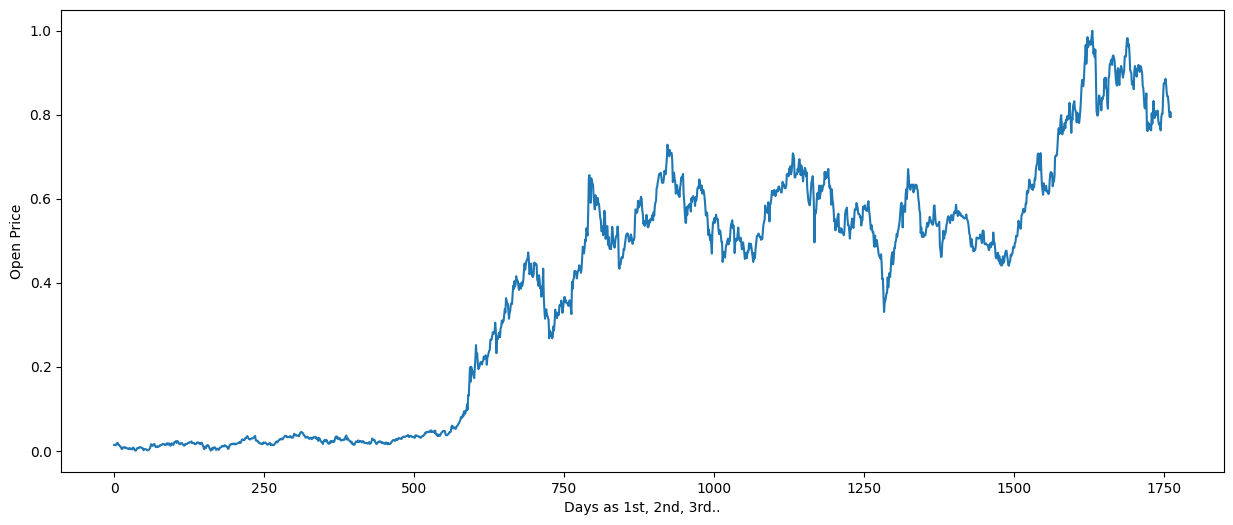

In [13]:

scaler = MinMaxScaler(feature_range = (0,1))

dataset_train = train_data.Open.values
print(dataset_train.shape)

# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
print(dataset_train.shape)

# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)


plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [14]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train before reshape : (1712, 50)
Shape of y_train before reshape : (1712,)
Shape of X_train after reshape : (1712, 50, 1)
Shape of y_train after reshape : (1712, 1)


In [15]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )
regressor.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
regressor.add(Dropout(0.2))

# adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50


C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.2589e-04 - loss: 0.5725
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 2.1240e-05 - loss: 0.2007
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.9361e-04 - loss: 0.1580
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 2.5427e-04 - loss: 0.0961
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 2.0818e-04 - loss: 0.0809
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 2.5427e-04 - loss: 0.0560
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 3.5946e-04 - loss: 0.0490
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0375
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0014 - loss: 0.0330
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.5202e-04 - loss: 0.0286
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.3880e-04 - loss: 0.0273
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━

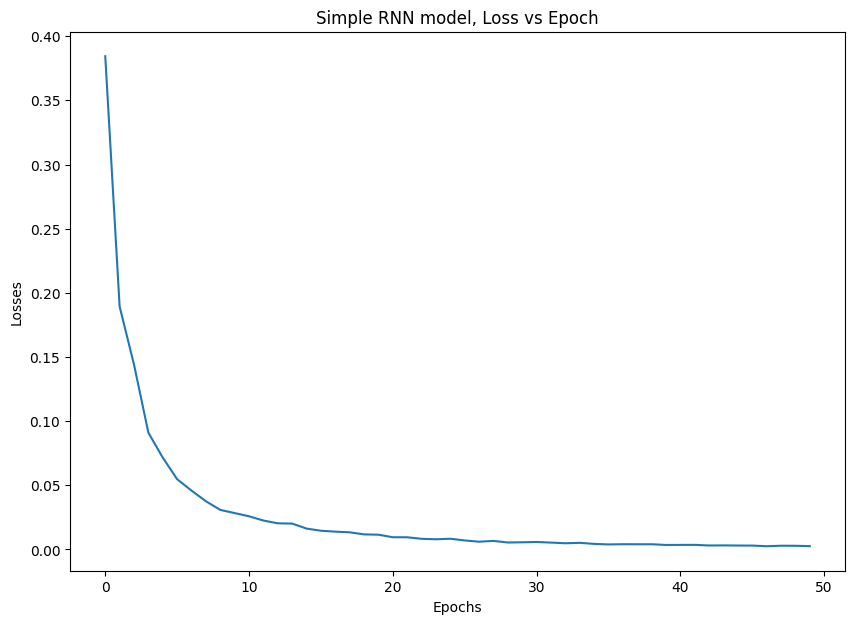

In [16]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

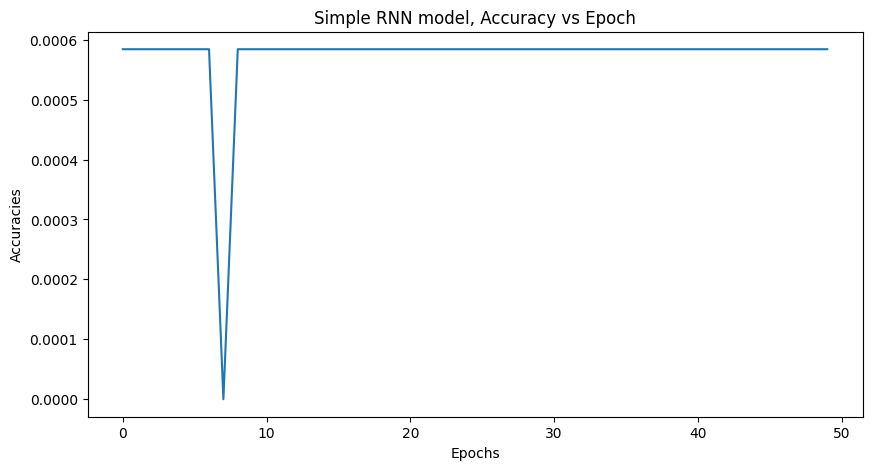

In [17]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [18]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original

y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


(1712, 1)

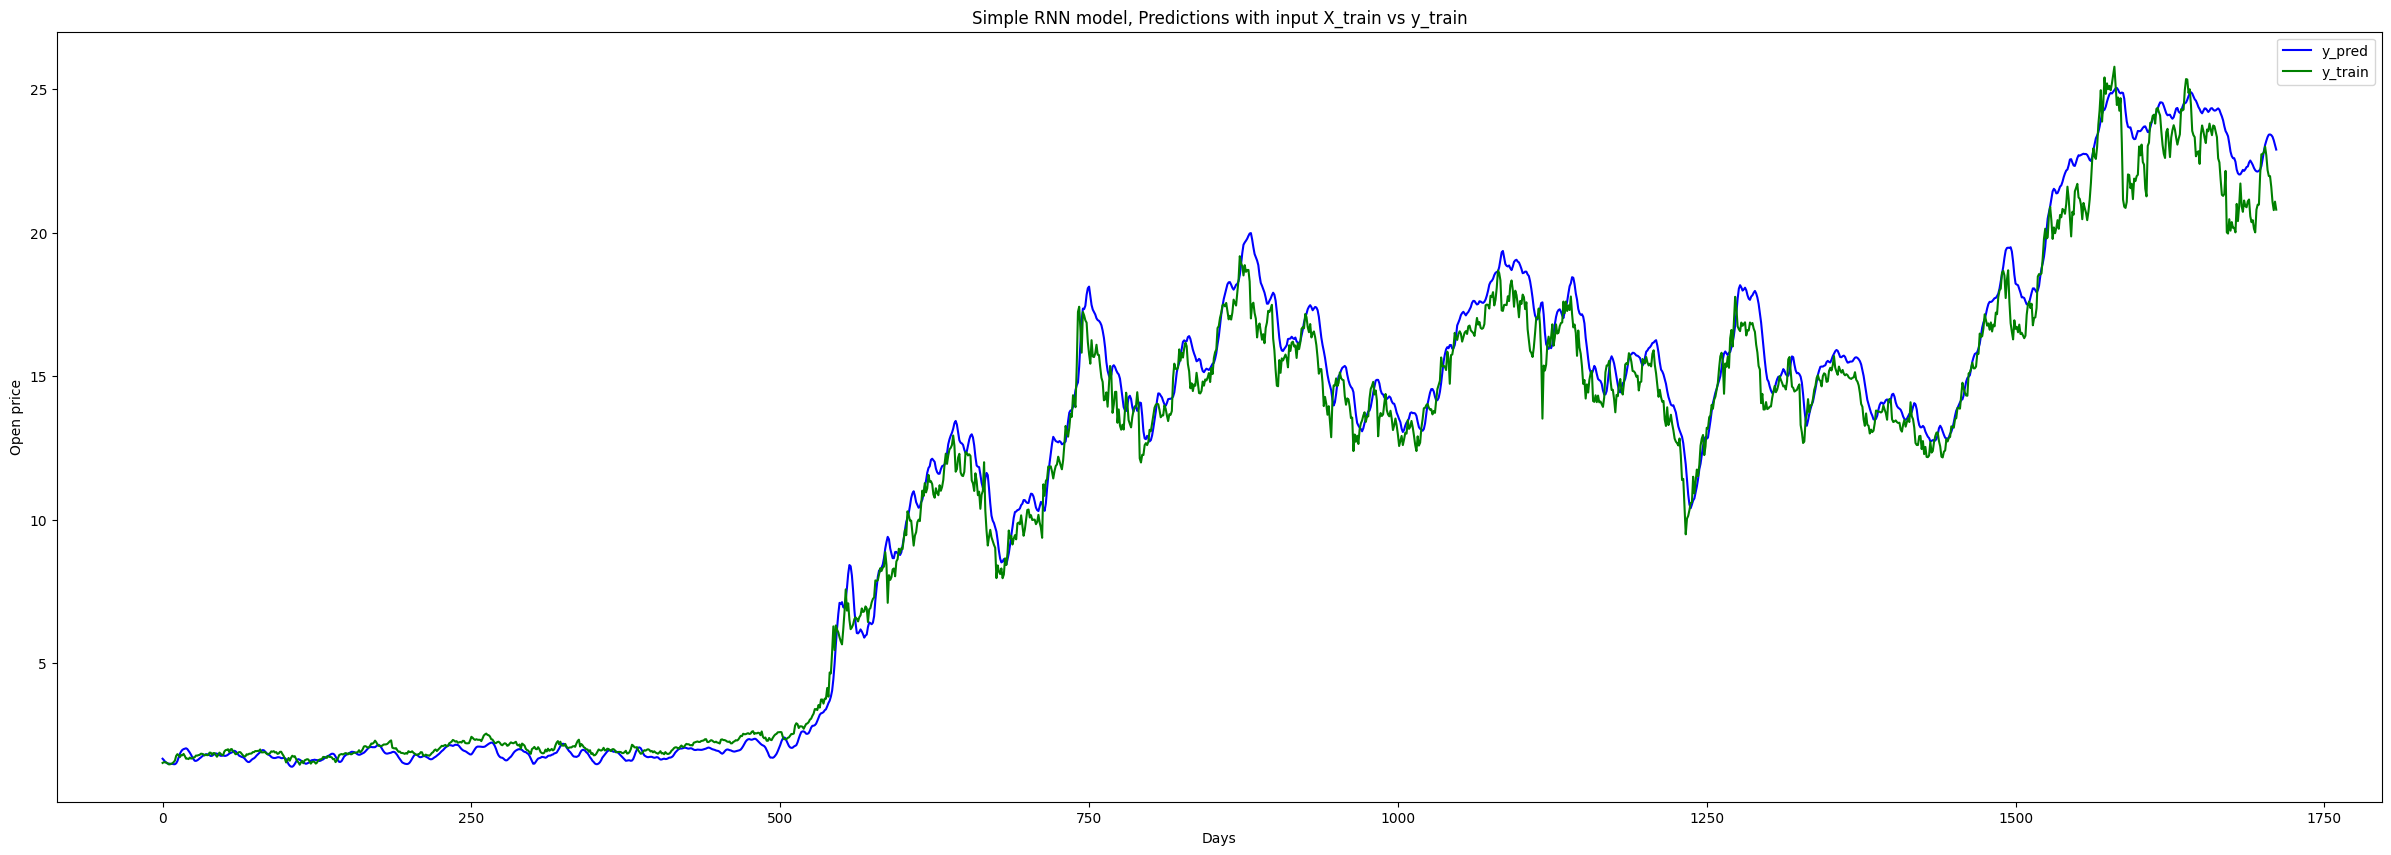

In [19]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [20]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (755, 1)


In [21]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test before reshape : (705, 50)
Shape of y_test before reshape : (705,)
Shape of X_test after reshape : (705, 50, 1)
Shape of y_test after reshape : (705, 1)


In [22]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Shape of y_pred_of_test : (705, 1)


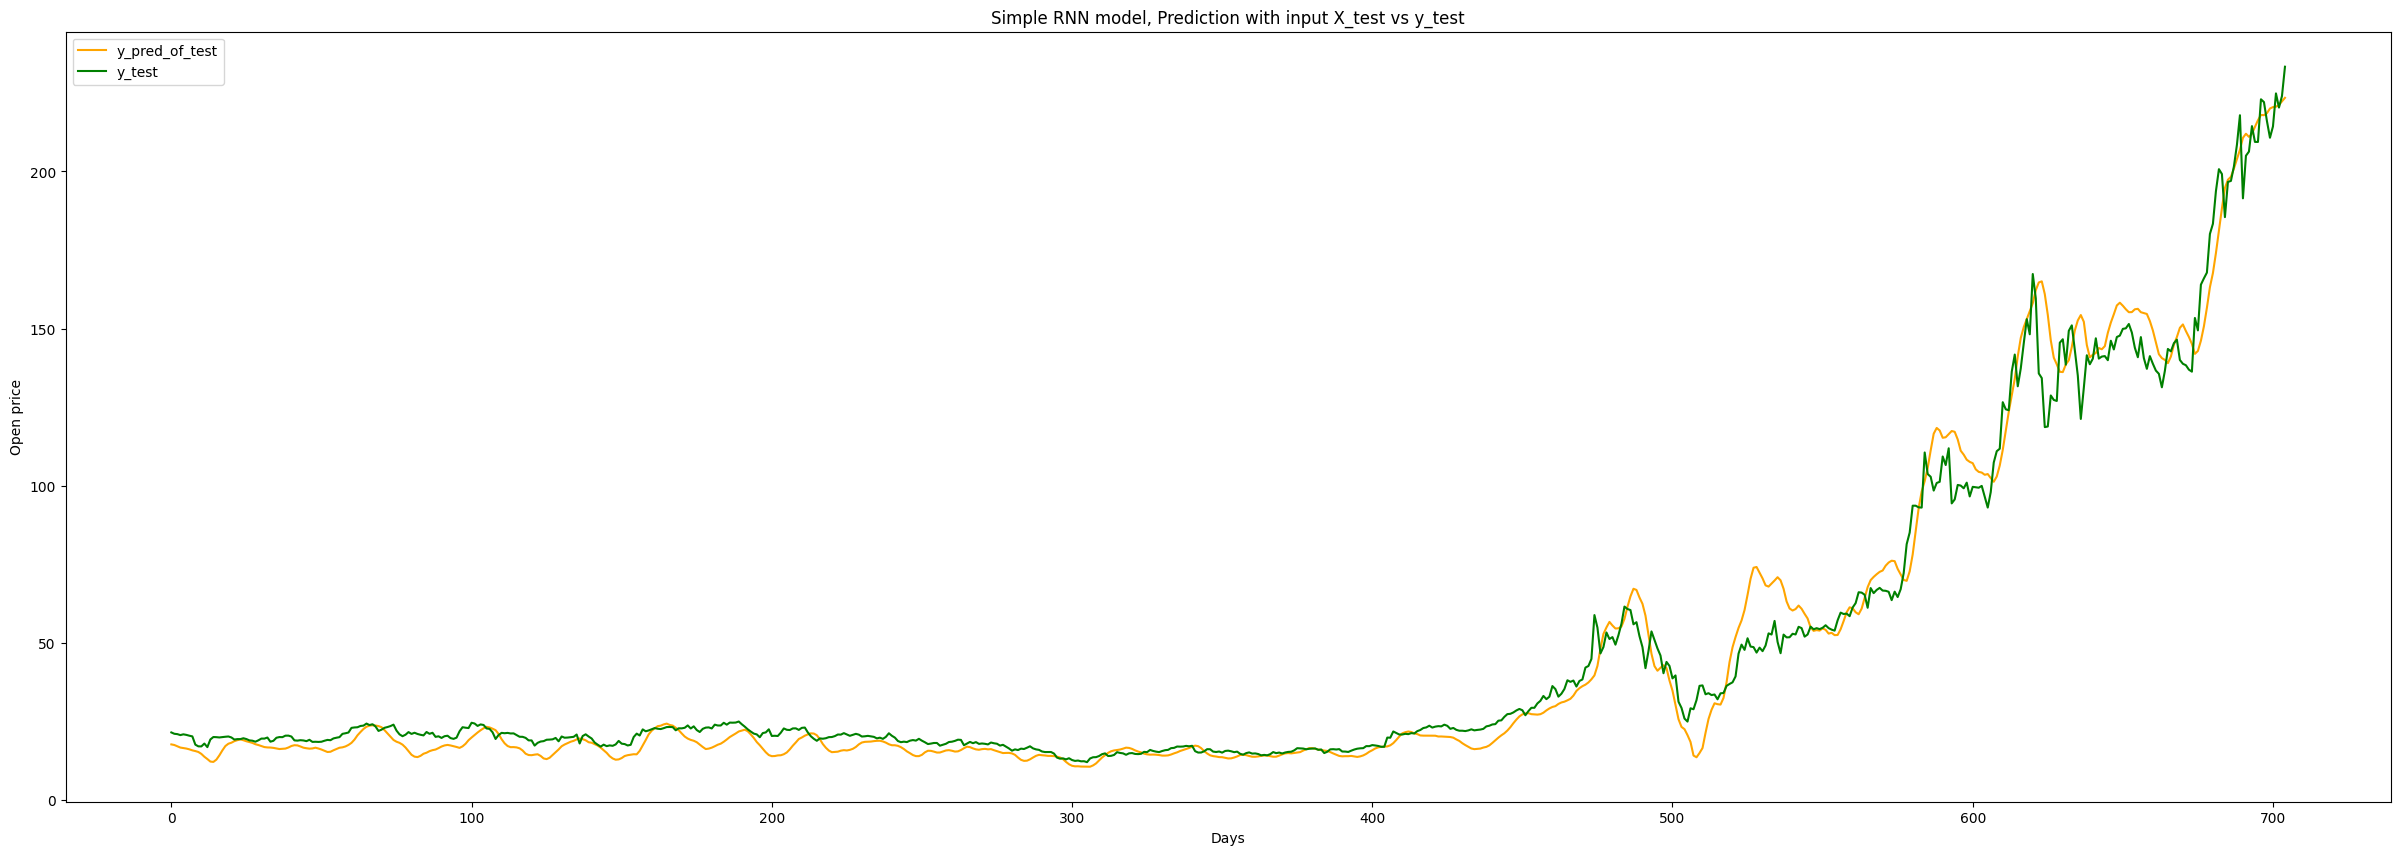

In [23]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

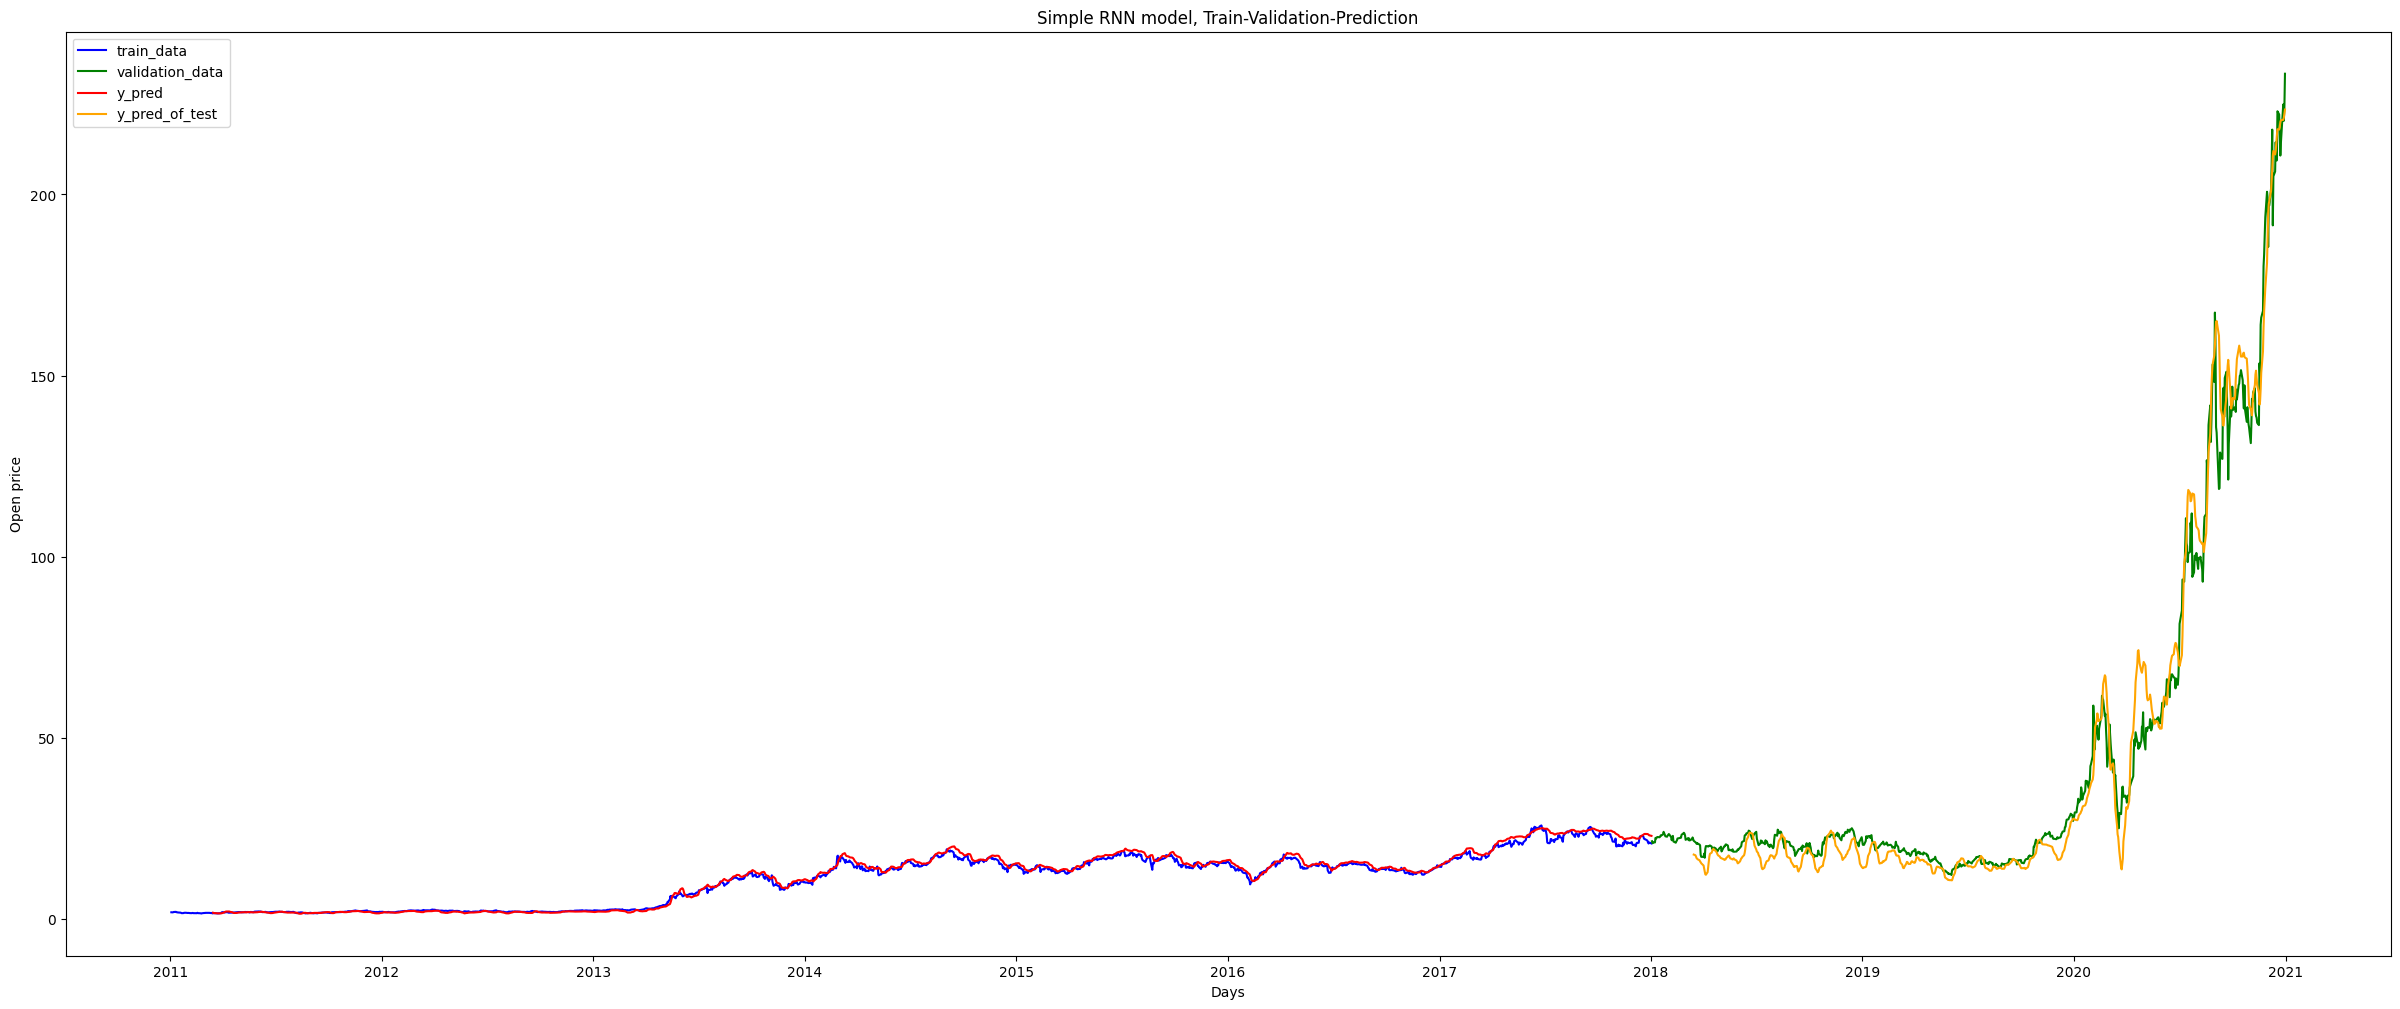

In [24]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

# LSTM model

In [25]:
y_train = scaler.fit_transform(y_train)

In [26]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 3.9410e-04 - loss: 0.0099
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 9.0474e-04 - loss: 0.0012
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0011 - loss: 9.4760e-04
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0028 - loss: 8.0119e-04
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0025 - loss: 7.6273e-04
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 6.1283e-04 - loss: 6.3687e-04
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0018 - loss: 6.2937e-04
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0021 - loss: 5.0031e-04
Epoch 9/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0017 - loss: 4.0644e-04
Epoch 10/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 6.2417e-04 - loss: 4.7069e-04


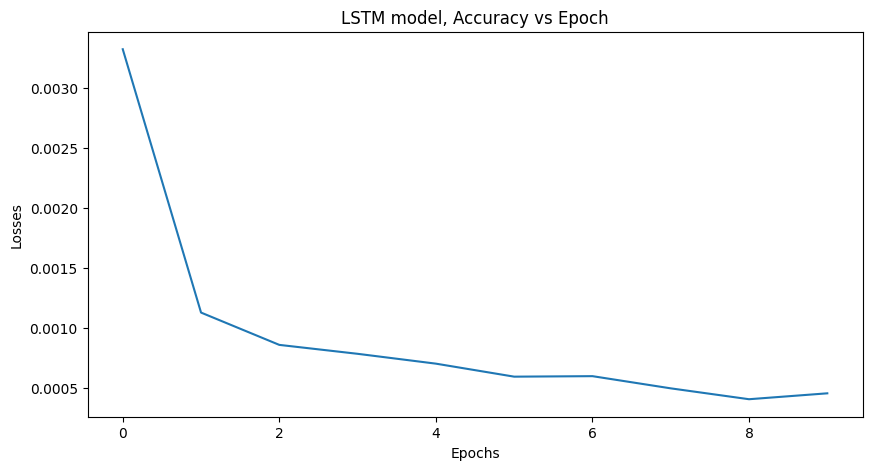

In [27]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


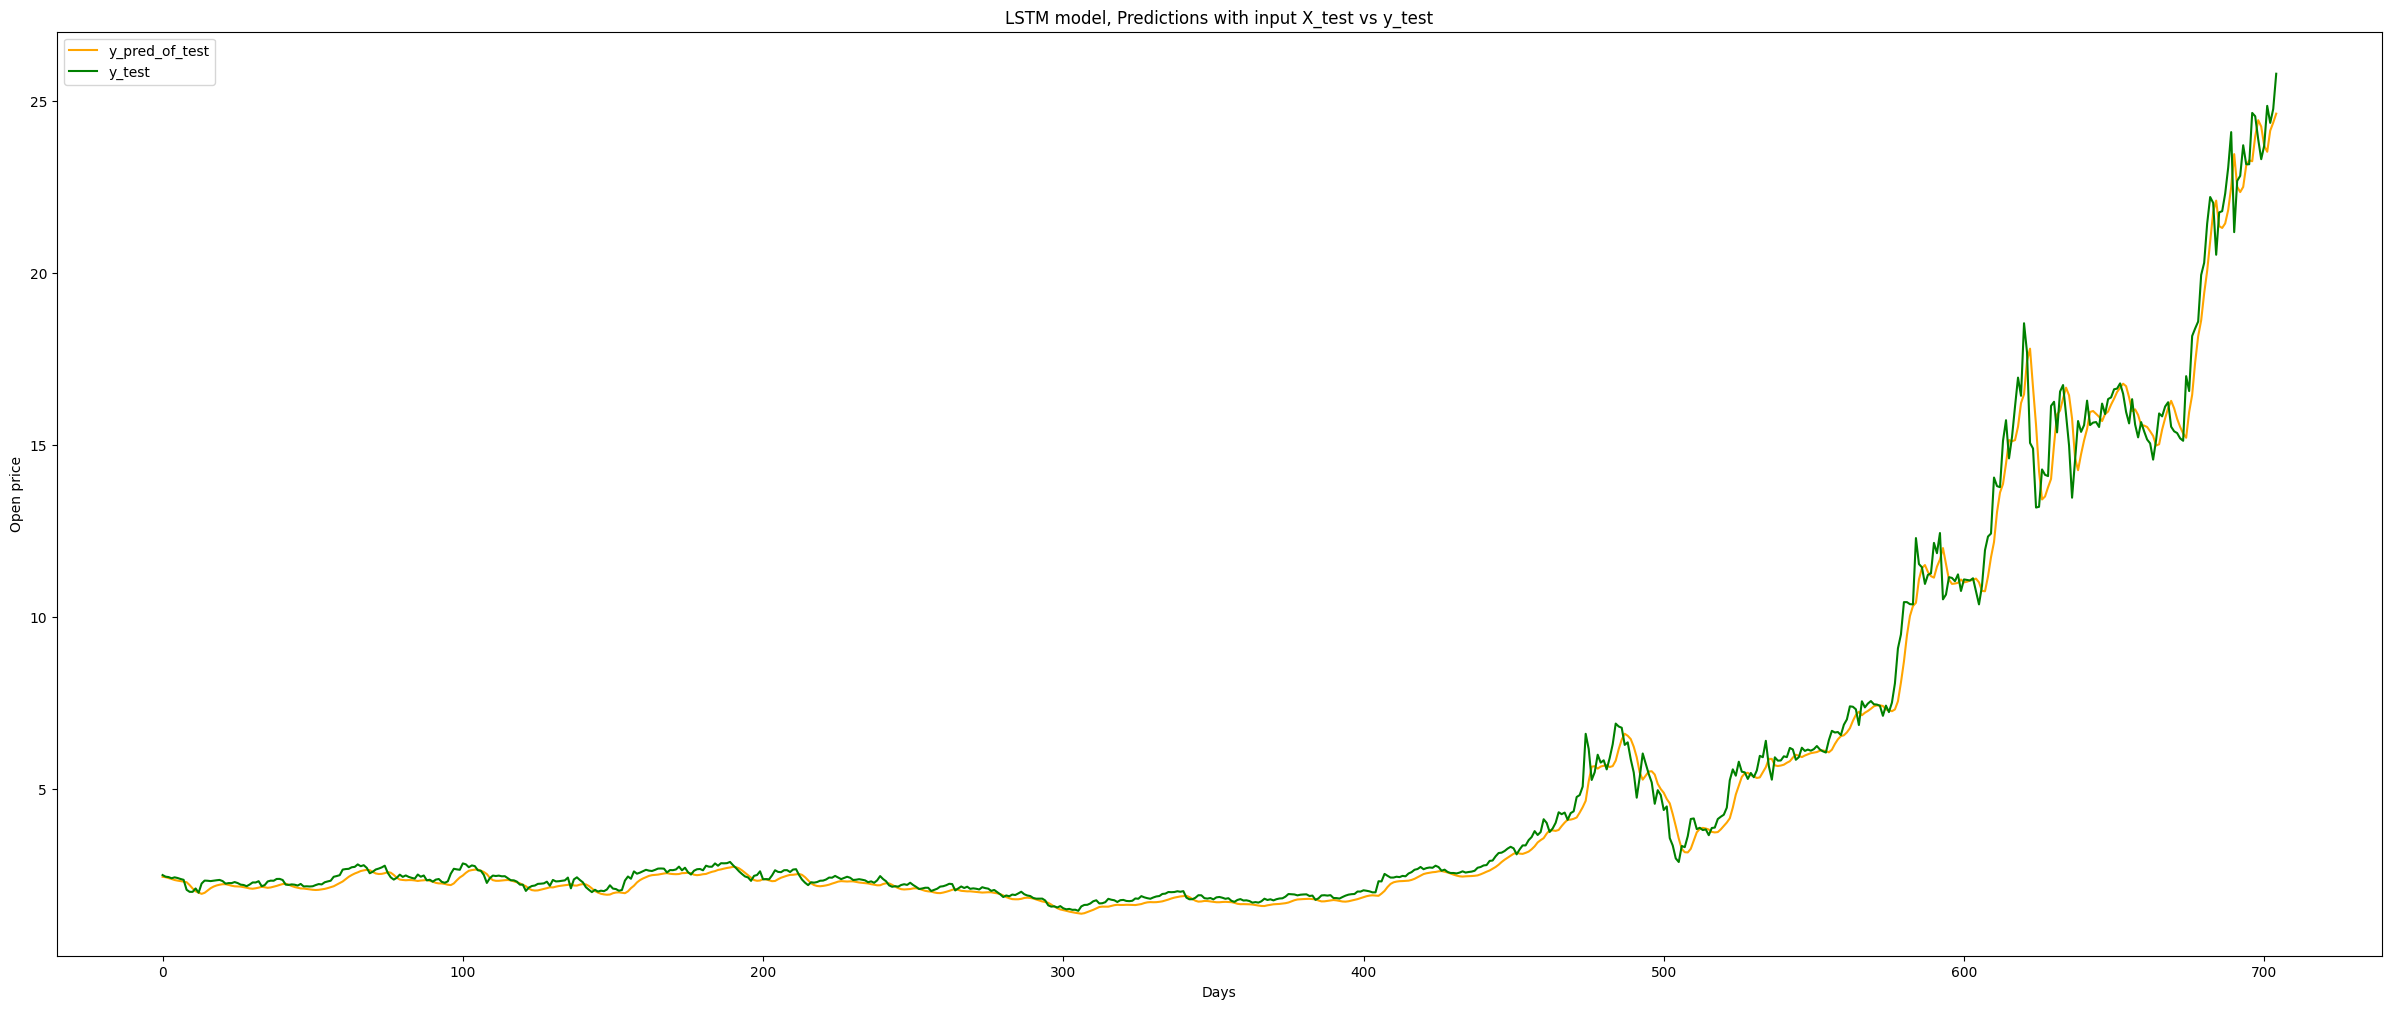

In [28]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [30]:
X_input = df.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)

simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

Shape of X_input : (1, 50, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Simple RNN, Open price prediction for 3/18/2017      : 226.20894
LSTM prediction, Open price prediction for 3/18/2017 : 228.67674
